# Exploratory Data Analysis

___
Prepared by [Ali Rifat Kaya](https://www.linkedin.com/in/alirifatkaya/)
___

# Table of Contents

1. [Import Libraries](#Import-Libraries)
2. [Read Data](#Read-Data)
3. [Numerical Exploratory Data Analysis](#Numerical-Exploratory-Data-Analysis)
4. [Examine `Amount` Variable](#Examine-Amount-Variable)
5. [Handling Time Feature](#Handling-Time-Feature)
6. [Split Data by Classes](#Split-Data-by-Classes)
7. [Visual Exploratory Data Analysis](#Visual-Exploratory-Data-Analysis)
8. [Feature Selection](#Feature-Selection)

# Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore') # silence warnings 

# Read Data

In [2]:
# read data
raw_data = pd.read_csv('creditcard.csv', header=0)
# copy data into another dataframe by keeping the original safe
df = raw_data.copy()

# Numerical Exploratory Data Analysis

In [3]:
# gives info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# check for missing values
print('Number of missing observations: \n{}'.format(df.isnull().sum()))

Number of missing observations: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


* The data set is pretty clean with proper datatypes and no missing values.

In [5]:
# Explore the data shape
print('Number of features:', df.shape[1])
print('Number of observations:', df.shape[0])

Number of features: 31
Number of observations: 284807


In [6]:
# have a look to data - returns first 5 observations
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# gives numerical summary of the data
df.describe().round(3)
# All components (v1-v28) are standardized mean = 0 std = 1 as a result of PCA
# Time and Amount are not standardized

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


# Examine `Amount` Variable

In [8]:
print(r'The average amount ($) of transactions (including 0$ transactions):', df.Amount.mean())
print('Number of transactions with 0$:', df[df.Amount == 0].shape[0])
print('Number of fraudulent transactions with 0$:', df[(df.Class == 1) & (df.Amount == 0)].shape[0])
print('Number of genuine transactions with 0$:', df[(df.Class == 0) & (df.Amount == 0)].shape[0])
# drops 0$ transactions
idx = np.zeros(df.shape[0], dtype=np.bool)
idx[df.Amount == 0] = True
idx = np.where(idx==True)
df.drop(idx[0], inplace=True)
print(r'The average amount ($) of transactions (excluding 0$ transactions):', df.Amount.mean())

The average amount ($) of transactions (including 0$ transactions): 88.34961925087359
Number of transactions with 0$: 1825
Number of fraudulent transactions with 0$: 27
Number of genuine transactions with 0$: 1798
The average amount ($) of transactions (excluding 0$ transactions): 88.91940126928057


# Handling Time Feature

In [9]:
# consolidate time into hours 
df['Hours'] = pd.to_datetime(df['Time'], unit='s').dt.hour

In [10]:
df.tail() # last 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hours
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23


* Consolidate credit card transaction to have better understanding of the histograms. This process will provide a unimodal histogram where the original *Time* variable gives bimodal histogram, since the data covers two days of transactions.

In [11]:
# After dropping 0$ transactions and adding `Hour` feature
print('Number of features:', df.shape[1])
print('Number of observations: {:,}'.format(df.shape[0]))

Number of features: 32
Number of observations: 282,982


In [12]:
# write the clean data into a csv file
df.to_csv('creditcard_new.csv', index=False)

# Split Data by Classes

In [13]:
# split data by classes
# datafrane includes only fraudulent transactions
df_fraud = df[df['Class'] == 1].reset_index(drop=True)
# dataframe includes only genuine transactions
df_genuine = df[df['Class'] == 0].reset_index(drop=True)

**Fraudulent Transactions Data**

In [14]:
# summary of all fraudulent observations
df_fraud.describe().round(3)
# some features do not have standardized distribution

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hours
count,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,...,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.000,465.0,465.000
mean,79620.589,-4.869,3.647,-7.102,4.491,-3.293,-1.385,-5.617,0.615,-2.532,...,0.017,-0.044,-0.104,0.038,0.041,0.167,0.073,129.307,1.0,11.561
std,47782.967,6.820,4.285,7.203,2.905,5.377,1.852,7.162,6.735,2.496,...,1.481,1.599,0.521,0.803,0.474,1.383,0.554,262.299,0.0,6.641
min,472.000,-30.552,-7.449,-31.104,-1.313,-22.106,-6.406,-43.557,-41.044,-13.320,...,-8.887,-19.254,-2.028,-4.782,-1.153,-7.263,-1.869,0.010,1.0,0.000
25%,41204.000,-6.160,1.176,-8.858,2.287,-4.801,-2.513,-8.427,-0.233,-3.846,...,-0.516,-0.343,-0.439,-0.325,-0.264,-0.026,-0.104,1.000,1.0,5.000
50%,72327.000,-2.406,2.661,-5.048,4.083,-1.615,-1.358,-3.059,0.592,-2.065,...,0.092,-0.072,-0.061,0.069,-0.008,0.391,0.145,17.060,1.0,12.000
75%,125200.000,-0.440,5.126,-2.277,6.371,0.131,-0.401,-0.955,1.778,-0.749,...,0.653,0.336,0.293,0.465,0.400,0.830,0.380,111.700,1.0,17.000
max,170348.000,2.132,22.058,2.250,12.115,11.095,6.474,5.803,20.007,3.354,...,8.316,5.466,1.091,2.208,2.745,3.052,1.779,2125.870,1.0,23.000


* The distributions of PCA components in the `df_fraud` data frame does not the standard normal distribution.
* This is a sign that we can use the distributions of features in each dataset (`df_genuine` and `df_fraud`) to come up with features that can help us to distinguish the fraudulent transactions from the genuine ones.

In [15]:
# some statistics about fraudulent observations
print('Minimum fraudulent transaction amount is {} euros.'.format(min(df_fraud['Amount'])))
print('Maximum fraudulent transaction amount is {} euros.'.format(max(df_fraud['Amount'])))
print('There was a fraudulent transaction in every {:0.3f} seconds.'.format((max(df['Time'])/df_fraud.shape[0])))

Minimum fraudulent transaction amount is 0.01 euros.
Maximum fraudulent transaction amount is 2125.87 euros.
There was a fraudulent transaction in every 371.596 seconds.


**Genuine Transactions Data**

In [16]:
# summary of all valid transactions
df_genuine.describe().round(3) # shows only 3 decimals
# all features have standardized distribution

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hours
count,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,...,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.000,282517.0,282517.000
mean,94874.028,0.008,-0.008,0.008,-0.019,0.003,0.001,0.012,-0.001,0.006,...,-0.002,0.000,0.000,-0.001,-0.001,-0.000,0.000,88.853,0.0,14.059
std,47478.022,1.929,1.636,1.459,1.389,1.356,1.329,1.178,1.160,1.090,...,0.724,0.620,0.606,0.520,0.482,0.399,0.330,250.800,0.0,5.832
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-31.765,-73.217,-6.291,...,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.010,0.0,0.000
25%,54273.000,-0.917,-0.603,-0.888,-0.855,-0.692,-0.768,-0.550,-0.209,-0.640,...,-0.544,-0.162,-0.355,-0.318,-0.328,-0.071,-0.053,5.990,0.0,10.000
50%,84727.000,0.019,0.061,0.180,-0.029,-0.054,-0.276,0.043,0.021,-0.049,...,0.005,-0.011,0.041,0.016,-0.054,0.001,0.011,22.490,0.0,15.000
75%,139373.000,1.316,0.800,1.024,0.727,0.611,0.395,0.573,0.326,0.600,...,0.527,0.148,0.440,0.350,0.239,0.091,0.078,78.000,0.0,19.000
max,172792.000,2.455,18.902,9.383,16.875,34.802,73.302,120.589,18.709,15.595,...,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,0.0,23.000


In [17]:
# some statistics about genuine transactions
print('Minimum genuine transaction amount is {} euros.'.format(min(df_genuine['Amount'])))
print('Maximum genuine transaction amount is {} euros.'.format(max(df_genuine['Amount'])))
print('There was a genuine transaction in every {:0.3f} seconds.'.format((max(df['Time'])/df_genuine.shape[0])))

Minimum genuine transaction amount is 0.01 euros.
Maximum genuine transaction amount is 25691.16 euros.
There was a genuine transaction in every 0.612 seconds.


* The descriptive statistics of *fraudulent* transactions are pretty different than the descriptive statistics of the *genuine* transactions. 
* When we look at the mean and standard deviation, we see that the features of the only-*genuine* transactions data roughly follows Gaussian normal distribution; however, the features of the only-*fraudulent* transactions data does not follow that pattern.

# Visual Exploratory Data Analysis

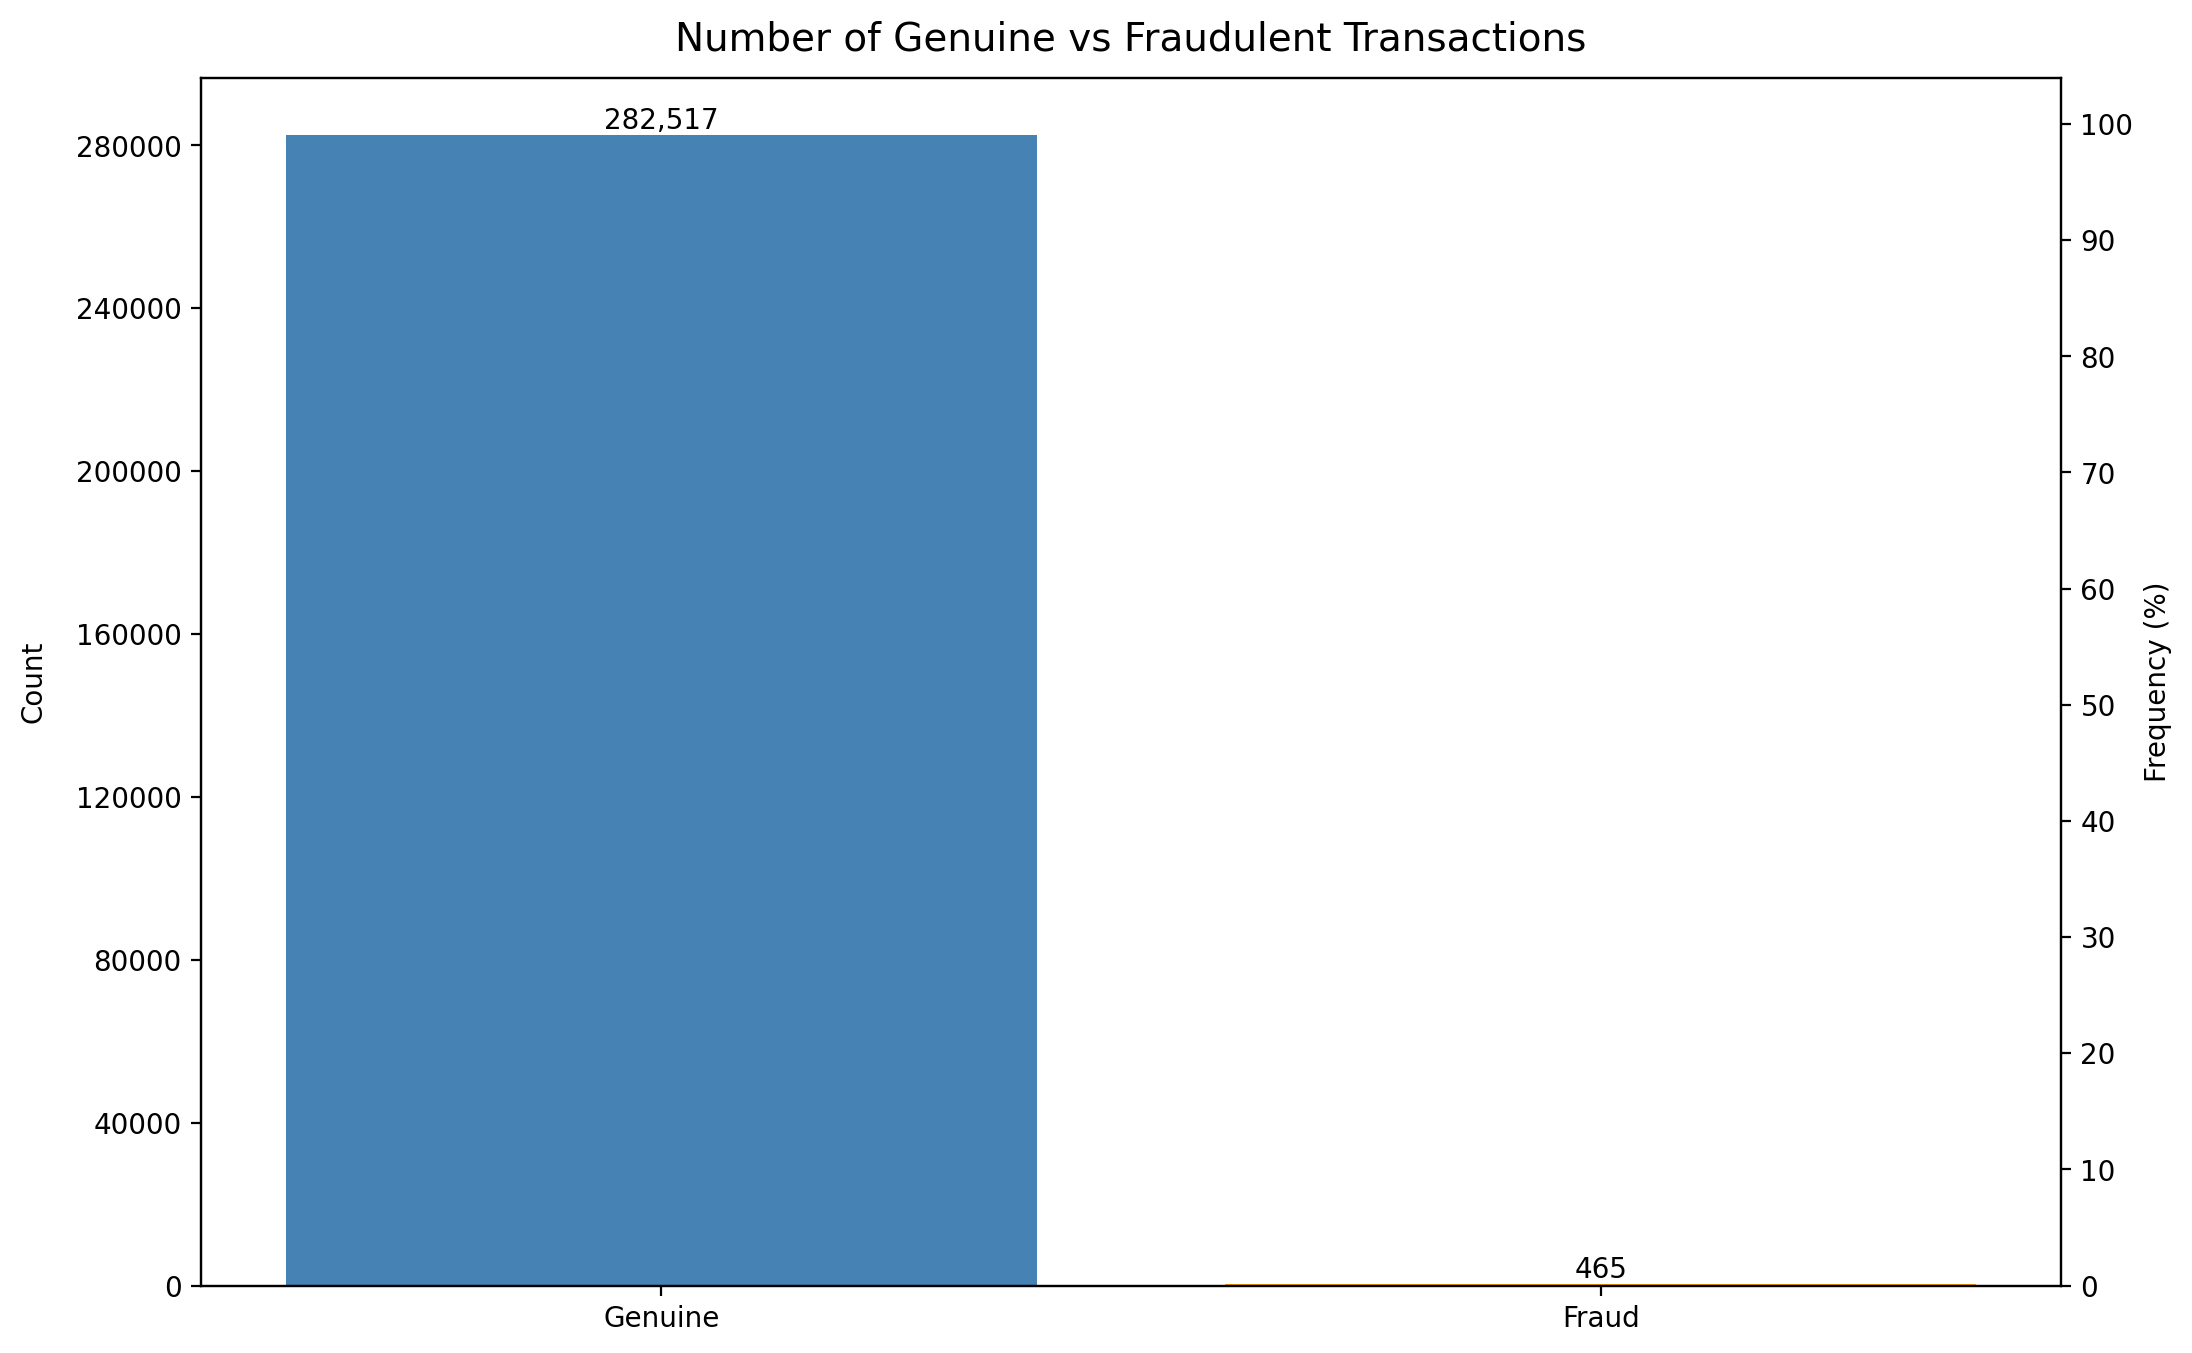

In [18]:
counts = [df_genuine.shape[0], df_fraud.shape[0]]  # counts of each class
# matplotlib figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
bars = ax.bar(range(2), counts, color=['steelblue', 'orange'])  # bar plot
ax.set_ylabel('Count', labelpad=10)  # lable on y-axis (on the left)
ax.set_xticks(range(2))  # sets the number of ticks on the x-axis
# sets the label of the ticks on the x-axis
ax.set_xticklabels(['Genuine', 'Fraud'])
# adjust the gap between the tickers on the y-axis on the left
ax.yaxis.set_major_locator(ticker.MultipleLocator(40000))
ax.set_title('Number of Genuine vs Fraudulent Transactions',
             size=14, pad=10)  # set the title
ax2 = ax.twinx()  # puts another y-axis on the right
ax2.set_ylabel('Frequency (%)')  # label on the y-axis (on the right)
ax2.set_ylim(0, 104)  # set the range to be shown on the y-axis
# adjust the gap between the tickers on the y-axis on the right
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# selects each bar in the figure and gets height and width of the bars
# use those to place the counts of each class on the bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    width = bar.get_width()
    ax.text(bar.get_x() + width/2, height,
            s='{:,}'.format(count),
            ha='center', va='bottom')
plt.show()  # shows the plot

In [19]:
# statistics about the whole data
print('Number of genuine transactions: {}'.format(df_genuine.shape[0]))
print('Number of fraudulent transactions: {}'.format(df_fraud.shape[0]))
print('\nProportion of all genuine transactions: {:0.4f}'.format(df[df.Class == 0].shape[0]/df.shape[0]))
print('Proportion of all fraud transactions: {:0.4f}'.format(df[df.Class == 1].shape[0]/df.shape[0]))

Number of genuine transactions: 282517
Number of fraudulent transactions: 465

Proportion of all genuine transactions: 0.9984
Proportion of all fraud transactions: 0.0016


* An extremely imbalanced dataset. The positive class is only a tiny portion of the dataset.

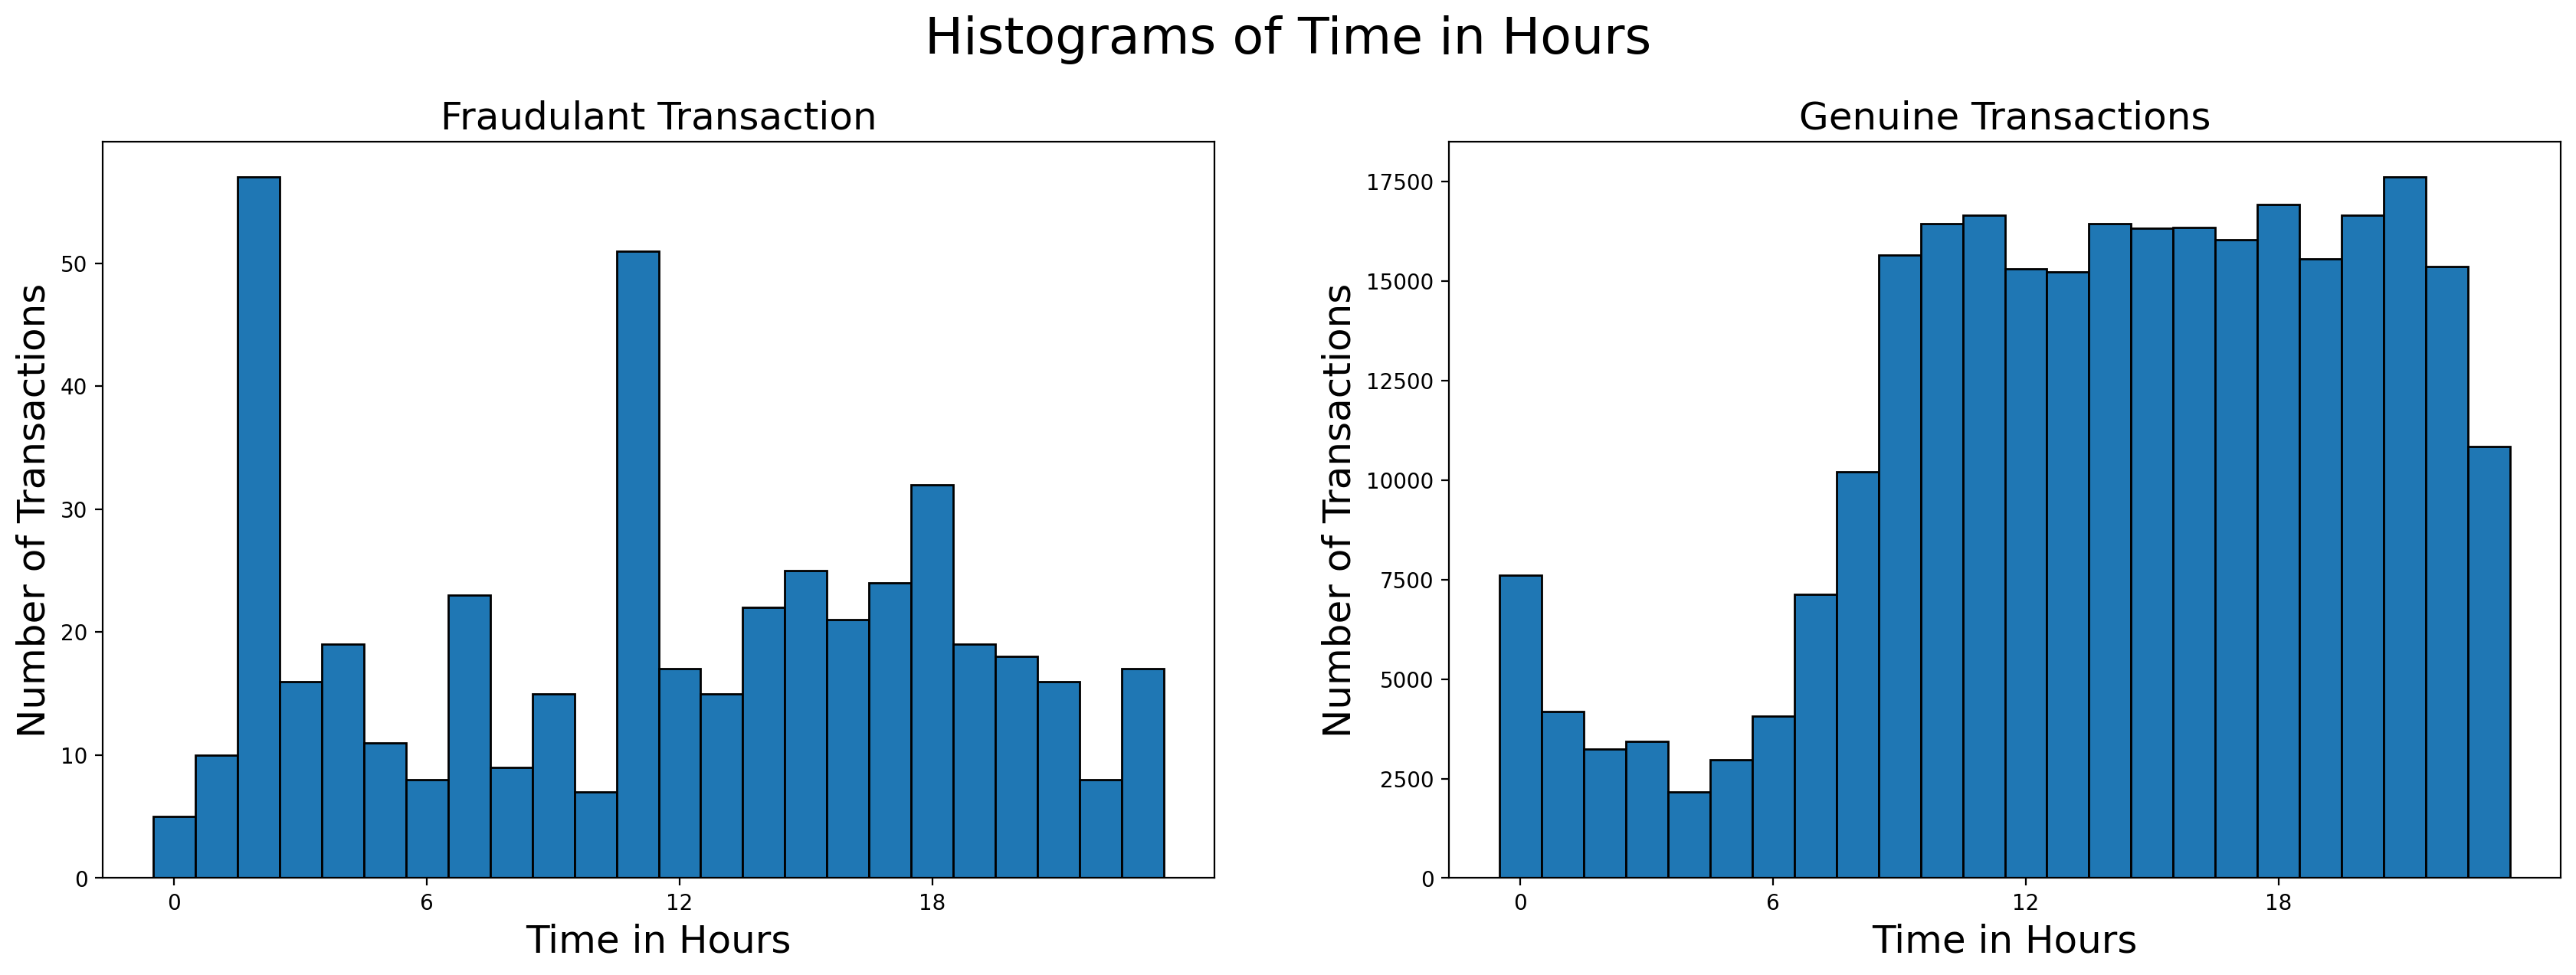

In [20]:
# Histograms of time in hours of genuine and fraudulent data
# (#row, # columns of plots - generate two side-to-side plots)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches([18, 7])  # set the sizes in inches
fig.set_dpi(200)  # set the resolution of the plot
# set a centered title to the figure at the top
fig.suptitle('Histograms of Time in Hours', size=24)
# axes[0] - subplot on the left
# axes[1] - subplot on the right
bins = np.arange(25) - 0.5 # set the edges for the bins
# plot histogram of time for the fraudulent transactions to the subplot on the left
axes[0].hist(df_fraud['Hours'], bins=bins, edgecolor='k')
# set the number of ticks on the x-axis
axes[0].set_xticks(np.arange(0, 24, 6))
axes[0].set_xlabel('Time in Hours', size=18)  # set the label on the x-axis
# set the label on the y-axis
axes[0].set_ylabel('Number of Transactions', size=18)
# set the title for the subplot on the left
axes[0].set_title('Fraudulant Transaction', size=18)
# plot the histogram of time for the genuine transactions to the subplot on the right
axes[1].hist(df_genuine['Hours'], bins=bins, edgecolor='k')
# set the number of ticks on the x-axis
axes[1].set_xticks(np.arange(0, 24, 6))
axes[1].set_xlabel('Time in Hours', size=18)  # set the label on the x-axes
# set the label on the y-axis
axes[1].set_ylabel('Number of Transactions', size=18)
# set the title for the subplot on the right
axes[1].set_title('Genuine Transactions', size=18)
# nice look to the figure
plt.tight_layout(5)
# shows the plot

* While the *genuine* transactions have an expected 'Time' histogram, the majority of the transactions occurs in the day time, the *fraudulent* transactions does not have the same pattern. This may be due to the limited number of samples from the positive class.

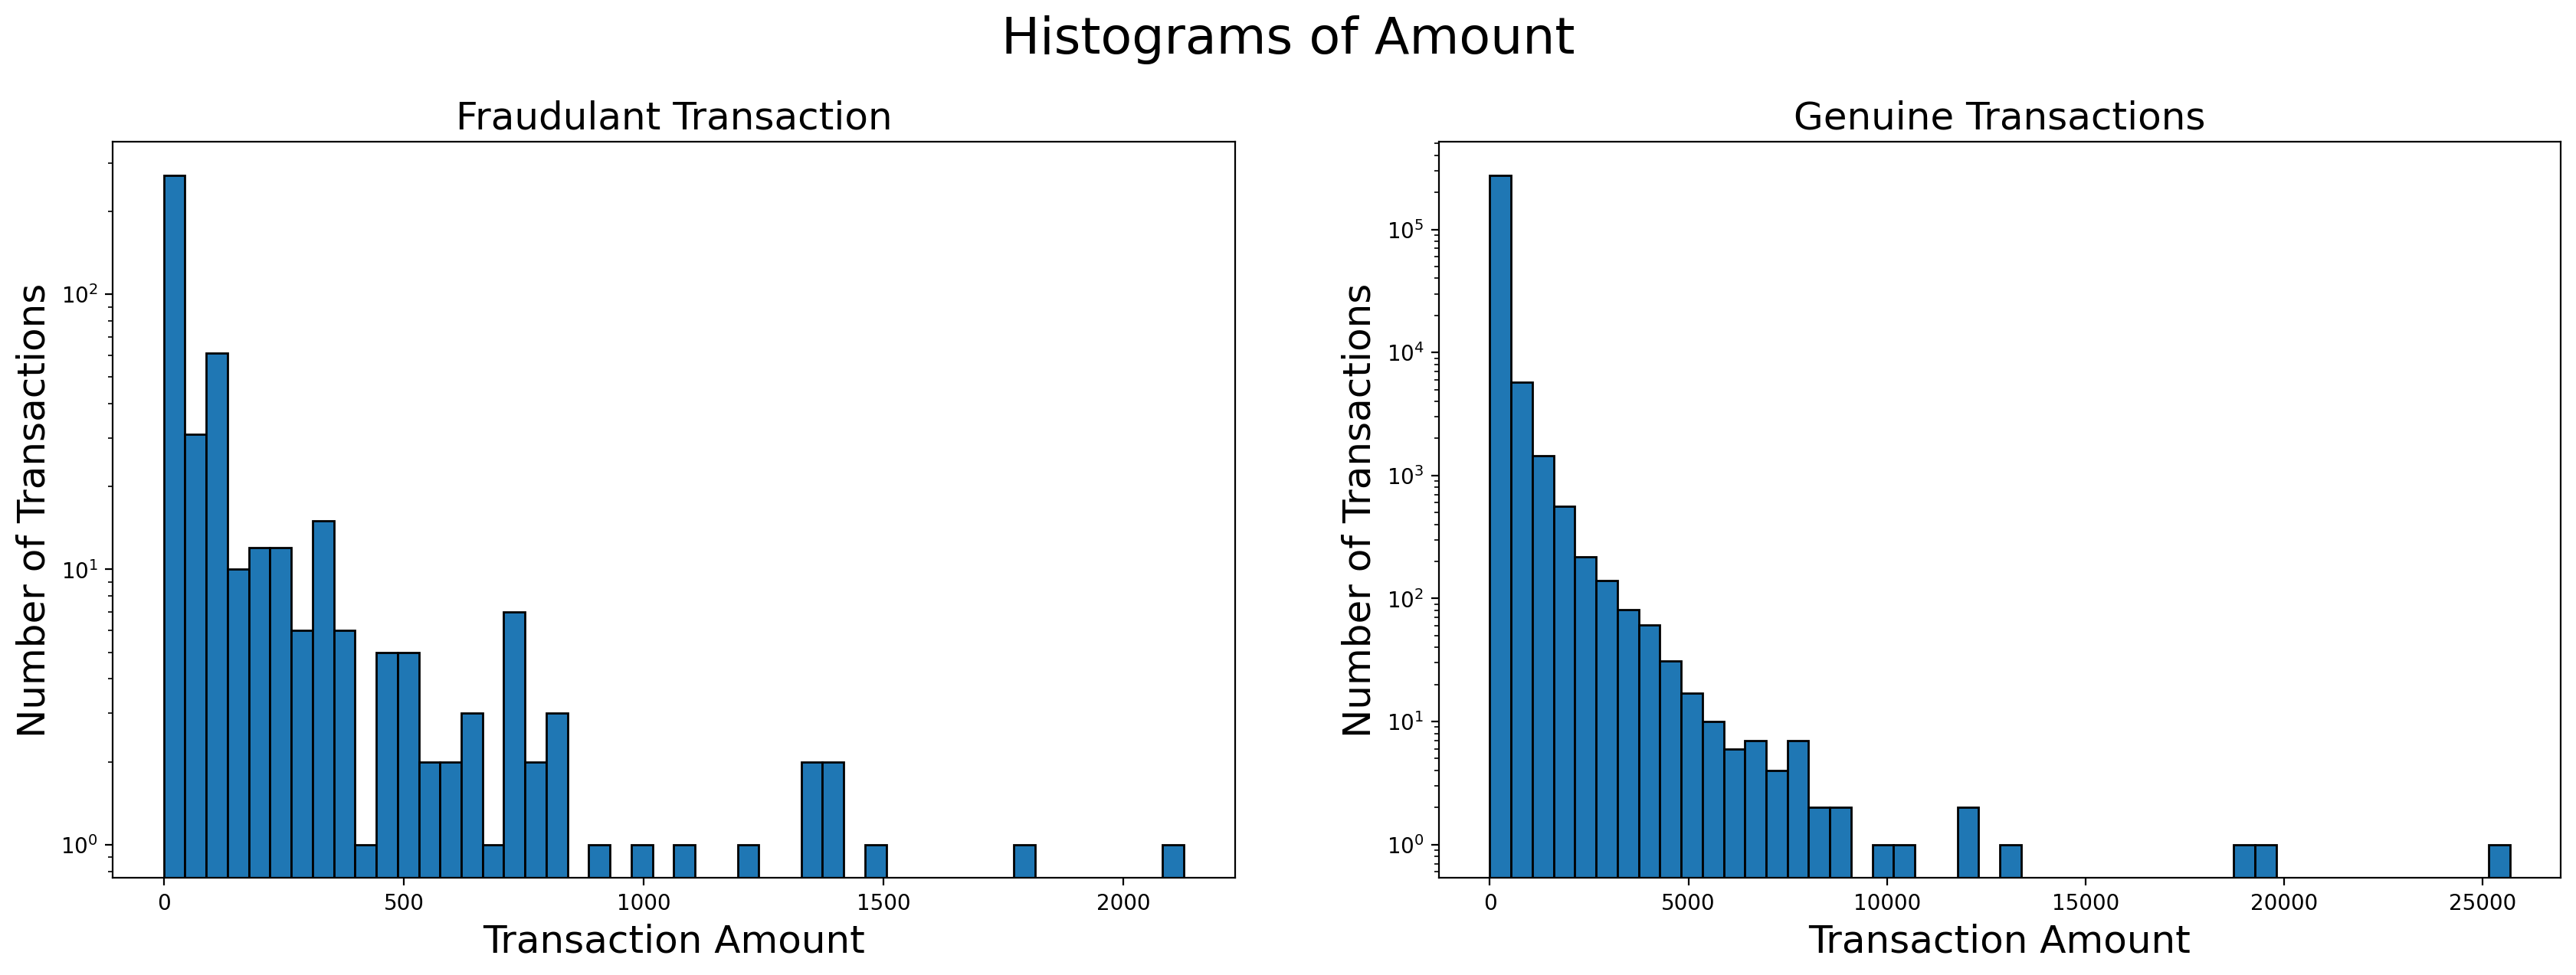

In [21]:
# Histograms of Amount of valid and fraudulent data
# (#row, # columns of plots - generate two side-to-side plots)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches([18, 7])  # set the sizes in inches
fig.set_dpi(200)  # set the resolution of the plot
# set a centered title to the figure at the top
fig.suptitle('Histograms of Amount', size=24)
# axes[0] - subplot on the left
# axes[1] - subplot on the right
# histogram of amount for the fraudulent transactions on the left
axes[0].hist(df_fraud['Amount'], bins=48, edgecolor='k')
# takes log transformation of the y-axis
axes[0].set_yscale('log')
# set the label on the x-axis
axes[0].set_xlabel('Transaction Amount', size=18)
# set the label on the y-axis
axes[0].set_ylabel('Number of Transactions', size=18)
# set the title to the subplot on the left
axes[0].set_title('Fraudulant Transaction', size=18)
# histogram of amount for the genuine transactions on the right
axes[1].hist(df_genuine['Amount'], bins=48, edgecolor='k')
# takes log transformation of the y-axis
axes[1].set_yscale('log')
# set the label on the x-axis
axes[1].set_xlabel('Transaction Amount', size=18)
# set the label on the y-axis
axes[1].set_ylabel('Number of Transactions', size=18)
# set the title to the subplot on the right
axes[1].set_title('Genuine Transactions', size=18)
# nice look to the figure
plt.tight_layout(5)

In [22]:
# some statistics about amounts
print(r'The average fraudulent transaction in ($): {:0.3f}'.format(df_fraud['Amount'].mean()))
print(r'The median for the fraudulent transactions in ($): {:0.03f}'.format(df_fraud['Amount'].median()))
print('\nThe average genuine transaction in ($): {:0.3f}'.format(df_genuine['Amount'].mean()))
print('The median for the genuine transactions in ($): {:0.3f}'.format(df_genuine['Amount'].median()))

The average fraudulent transaction in ($): 129.307
The median for the fraudulent transactions in ($): 17.060

The average genuine transaction in ($): 88.853
The median for the genuine transactions in ($): 22.490


* The gap between the mean and the median gives us a basic understanding of the distribution.
* In the `df_genuine` dataset, the gap between the mean and the median tells us that we face with a right skewed data. This kind of a behavior of the data is expected, since most people use their credit card for small/medium size purchases and less people do huge transactions with their credit cards.
* In the `df_fraud` dataset, the gap is much larger which means the distribution is more skewed than the distribution of genuine transactions.
* Even thought the number of transactions differ gigantically, we see approximately the same median which is a bit surprising. That means people mostly tend to their credit cards for small amounts. This maybe the reason for the median of the fraudulent transactions to be close the genuine transactions which can be an effort to stay undetected.
* We see those facts in the histograms.

# Feature Selection

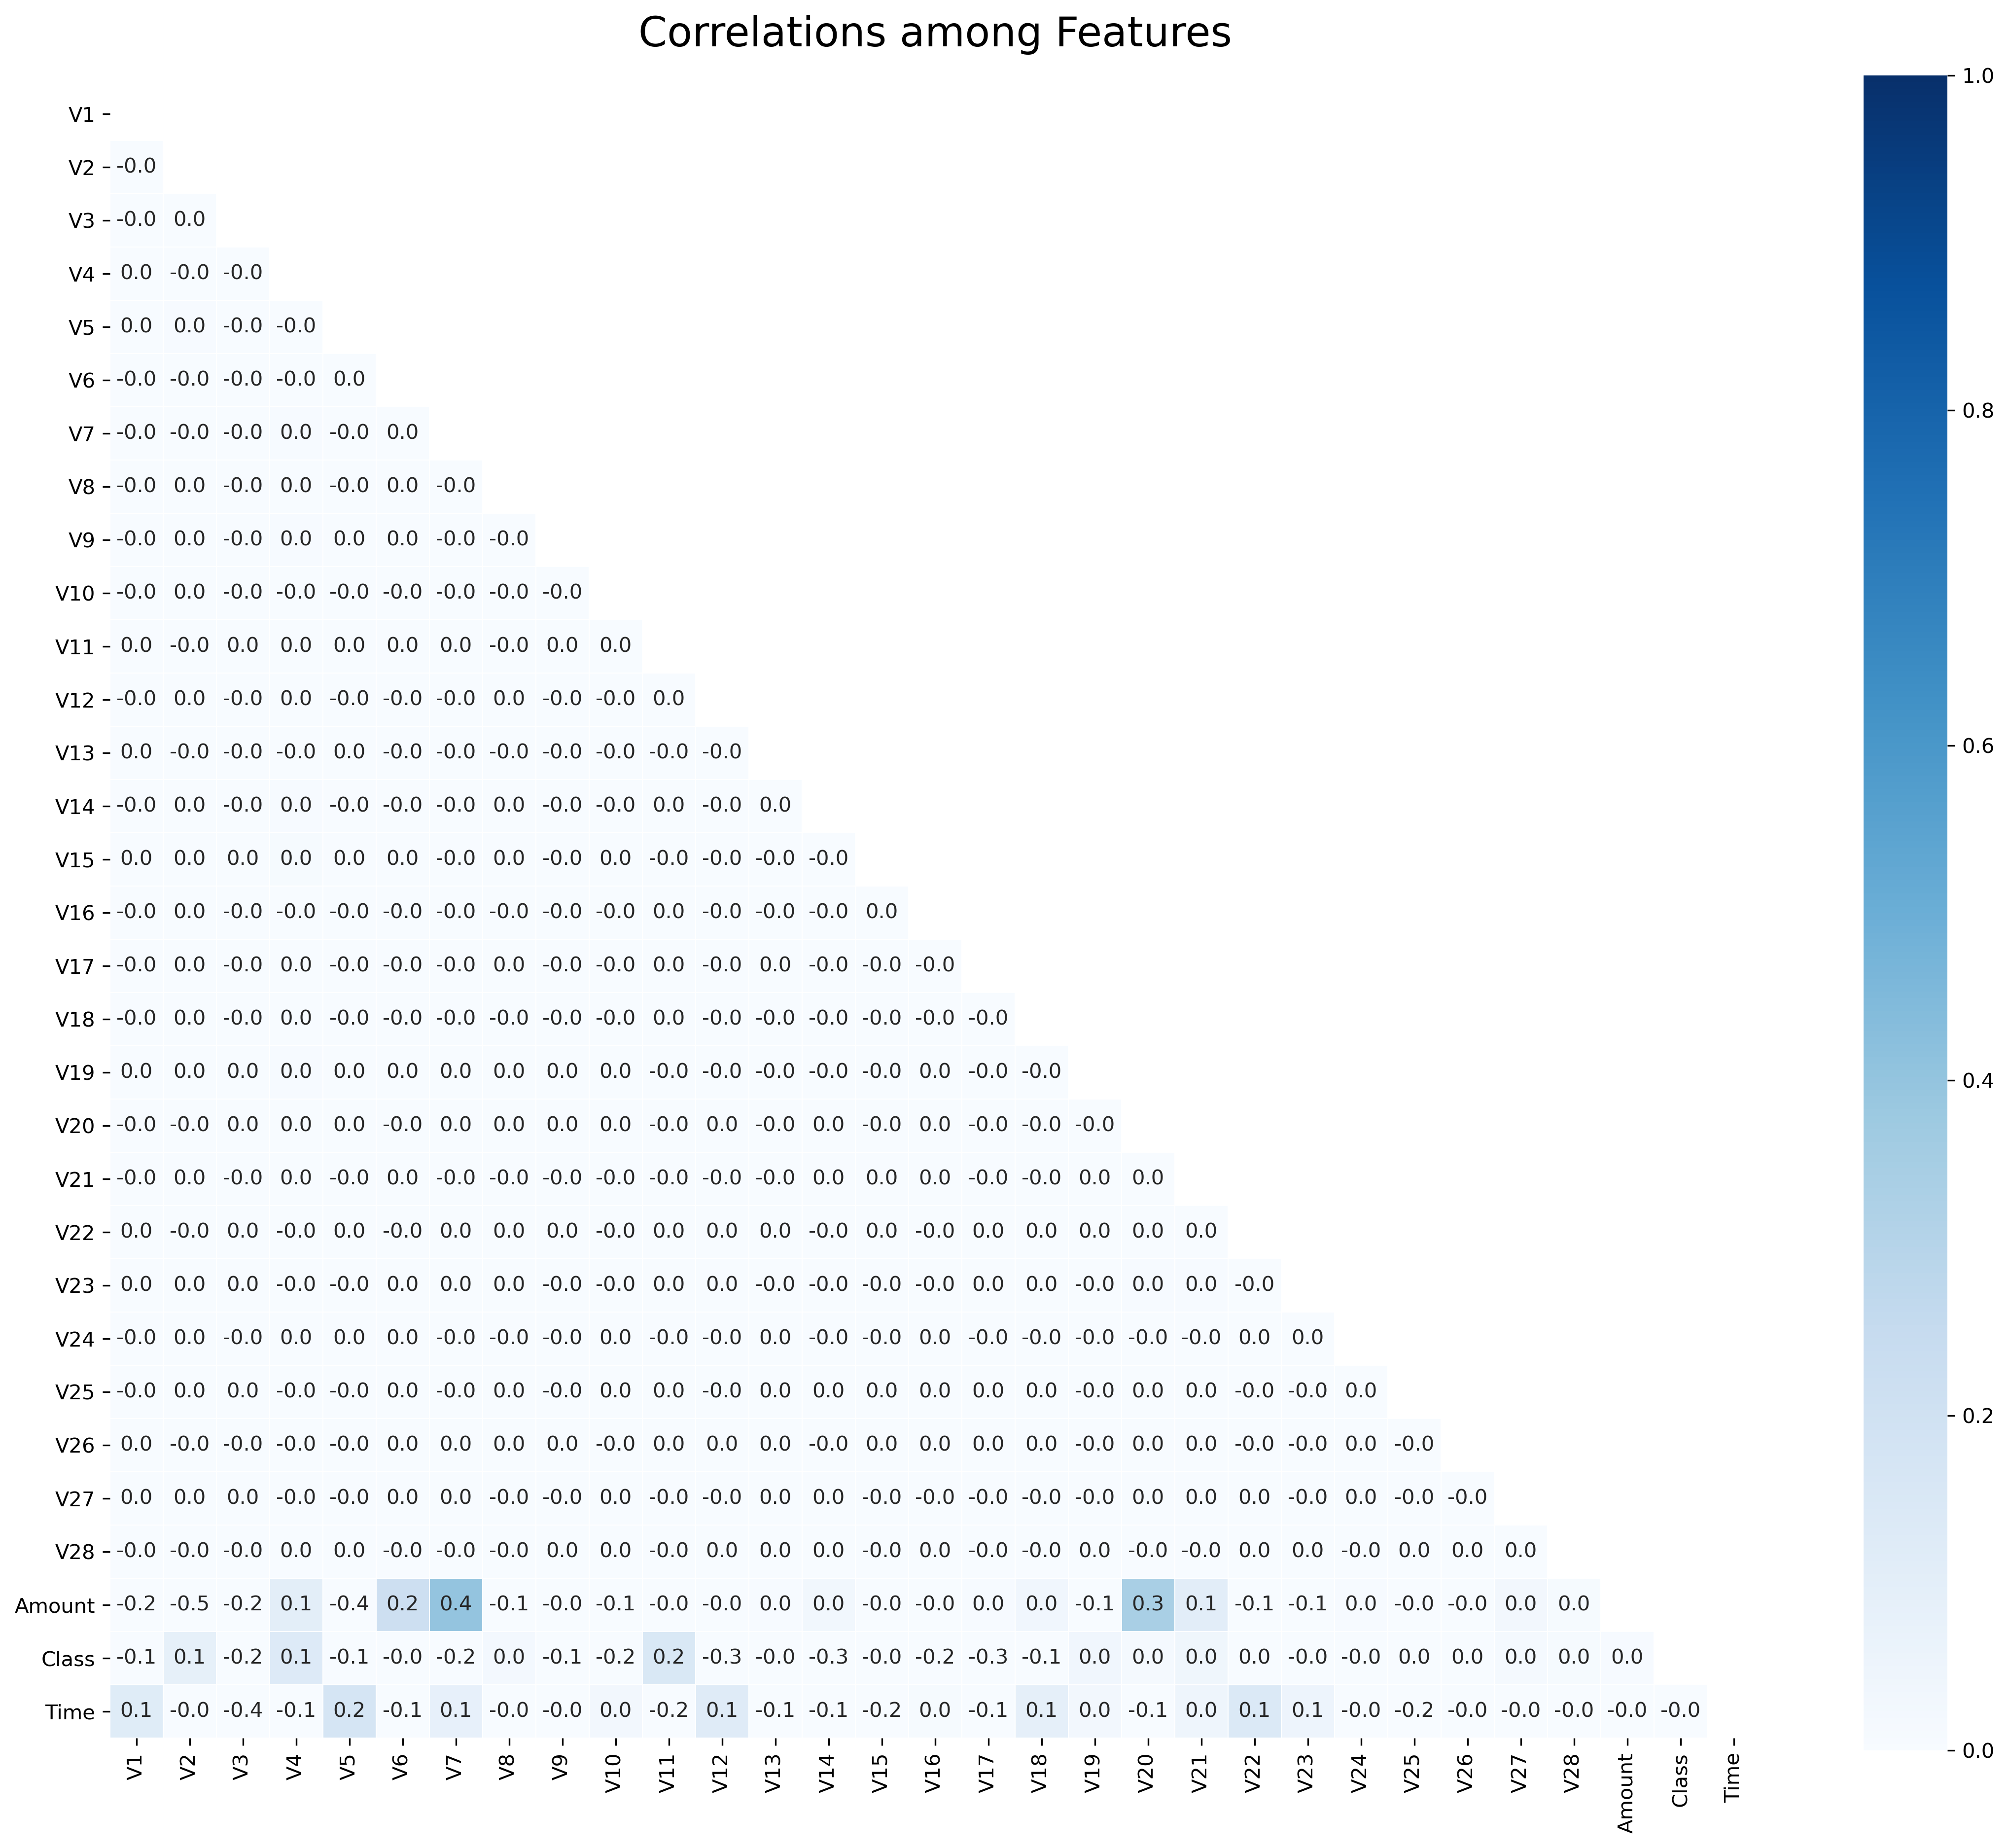

In [23]:
# inspect correlation among features
# this step will prove that all features V1-V28 have 0 correlation
# since the features are generated by PCA and are orthogonal to each other
# also further examine if there is any correlation exist between any
# component and either of 'Time', 'Amount', 'Class' features.

# takes all columns (including `Time`) - except `Hours`
feature_names = list(df.drop(['Hours', 'Time'], axis=1).columns)
feature_names.append('Time')
fig, axes = plt.subplots()  # generates ax and figure object
fig.set_size_inches([18, 15])  # set the figure sizes in inches
fig.set_dpi(300)  # set the resolution of the figure
corr = df[feature_names].corr()  # generates the correlation matrix
# generates a numpy matrix of zeros with the size of the correlation matrix
mask = np.zeros_like(corr)
# the heatmap will not show the cells where the mask is True
# (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
mask[np.triu_indices_from(mask)] = True  # shows only the left lower triangle
# plots the heatmap
ax = sns.heatmap(corr, mask=mask,
                 vmin=0, vmax=1,
                 linewidth=0.2, square=True, cmap='Blues',
                 annot=True, fmt='.1f')
#set title for the figure
ax.set_title('Correlations among Features', size=20, pad=20)
# shows the plot
plt.show()

# # adjusts the heights of the top and bottom squares of the heatmap
# # matplotlib 3.1.1 has a bug that shows only the half of the top
# # and bottom rows of the heatmap
# bottom, top = ax.get_ylim()
# _ = ax.set_ylim(bottom + 0.5, top - 0.5)

* As expected from the outcome of an PCA analysis, the features 'V1-28' are orthogonal. There is no clear pattern of correlation in the data.
* Besides, there are some correlations between components and either of `Amount`, `Class` or `Time` feature but they are not highly correlated. However, it still may worth to have a look.

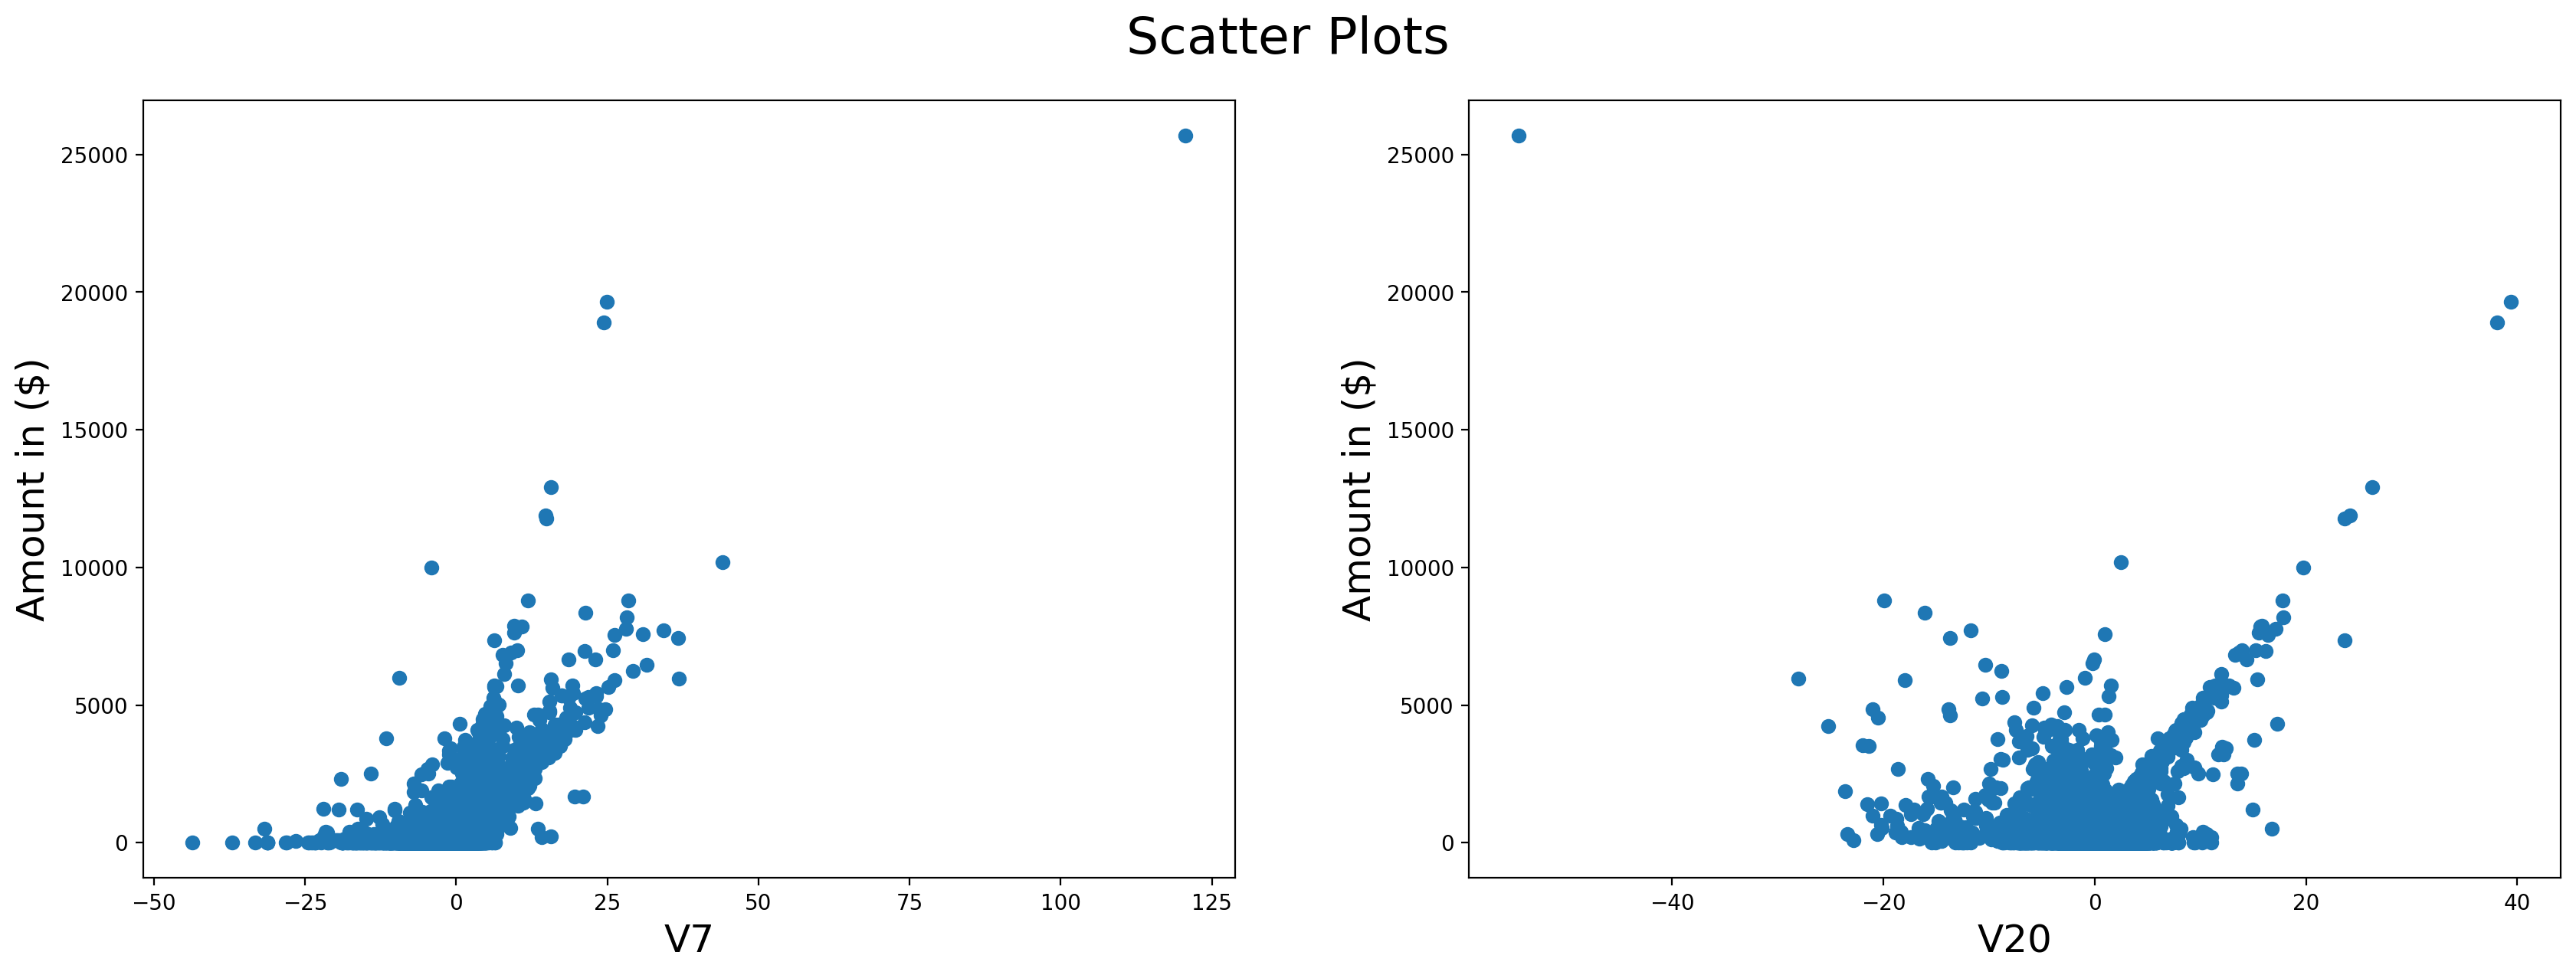

In [24]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches([18, 7])  # set the sizes in inches
fig.set_dpi(200)  # set the resolution of the plot
# set a centered title to the figure at the top
fig.suptitle('Scatter Plots', size=24)
# axes[0] - subplot on the left
# axes[1] - subplot on the right
# scatterplot of Amount and component V7
axes[0].scatter(df['V7'], df['Amount'])
# set the label on the x-axis
axes[0].set_xlabel('V7', size=18)
# set the label on the y-axis
axes[0].set_ylabel(r'Amount in ($)', size=18)
# scatterplot of Amount and component V20
axes[1].scatter(df['V20'], df['Amount'])
# set the label on the x-axis
axes[1].set_xlabel('V20', size=18)
# set the label on the y-axis
axes[1].set_ylabel(r'Amount in ($)', size=18)
# nice look to the plot
plt.tight_layout(5)
# shows the plot
plt.show()

* In the above, we have two scatter plots to show the relationship between 'Amount'-'V7' (on the left) and 'Amount'-'V20' (on the right). Even though, the correlation coefficients tells us that there are some correlation between those pairs, we see that the correlation coefficients are mostly inflated because of the outliers. As a result, there is no linear relationship between those pairs of variables

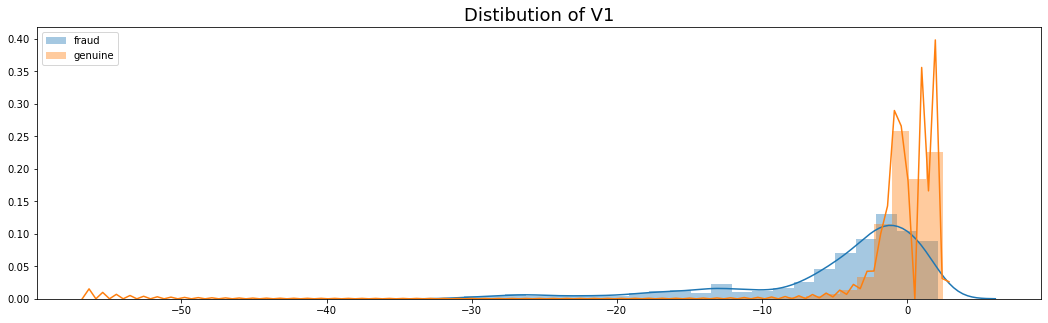

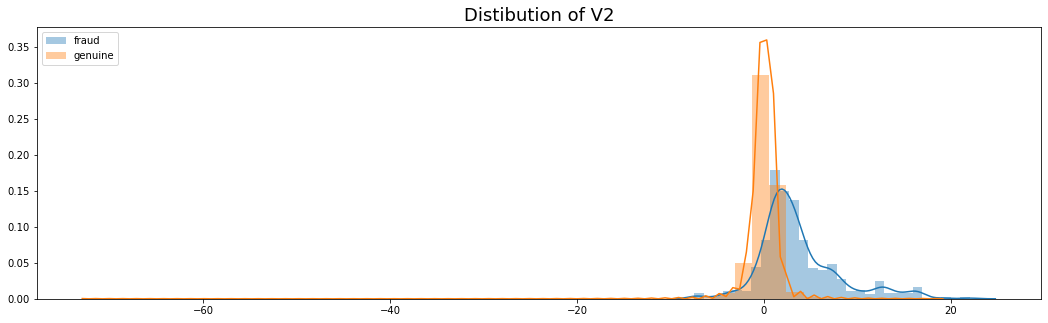

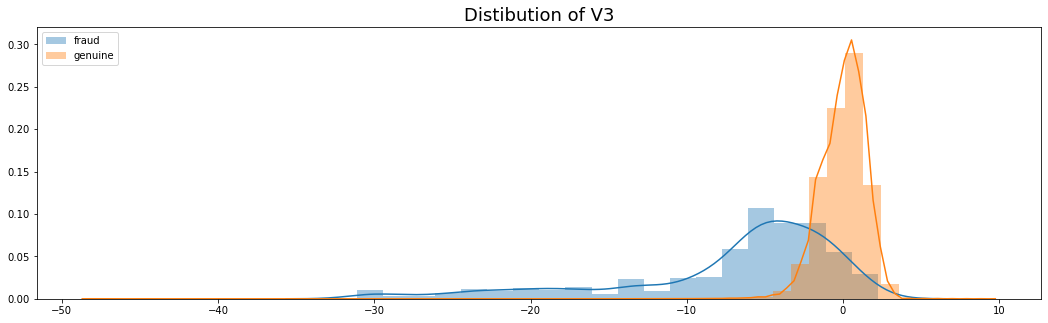

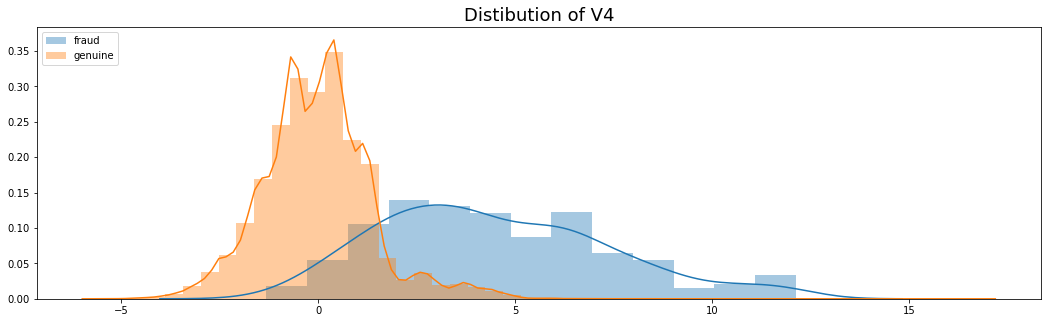

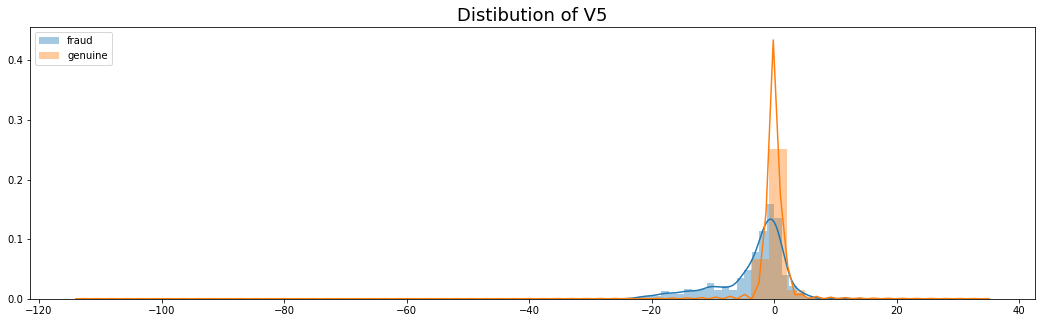

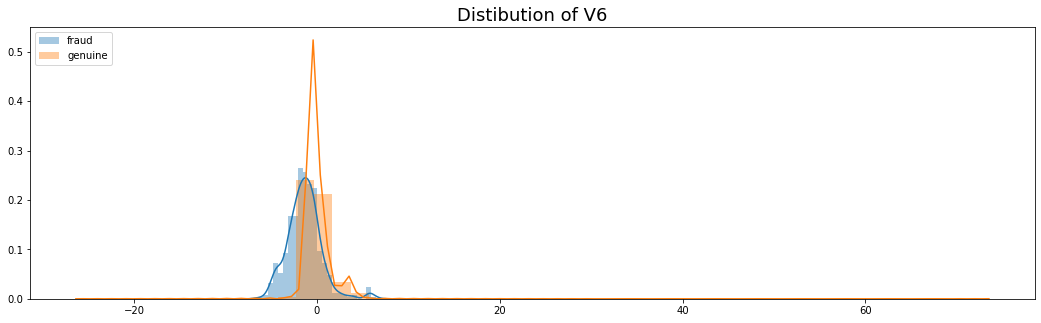

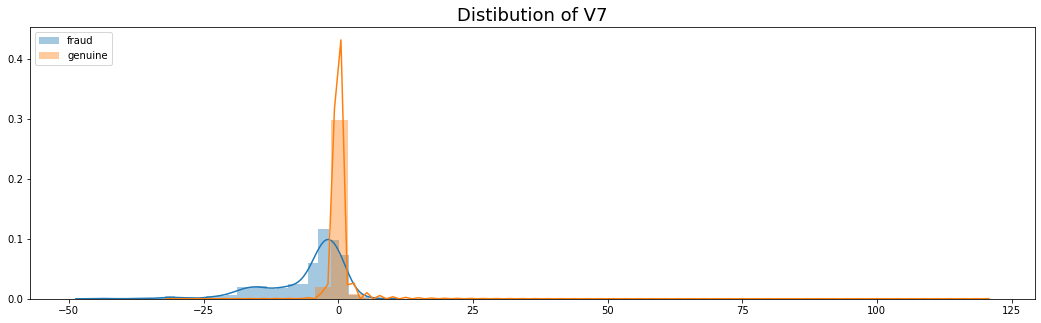

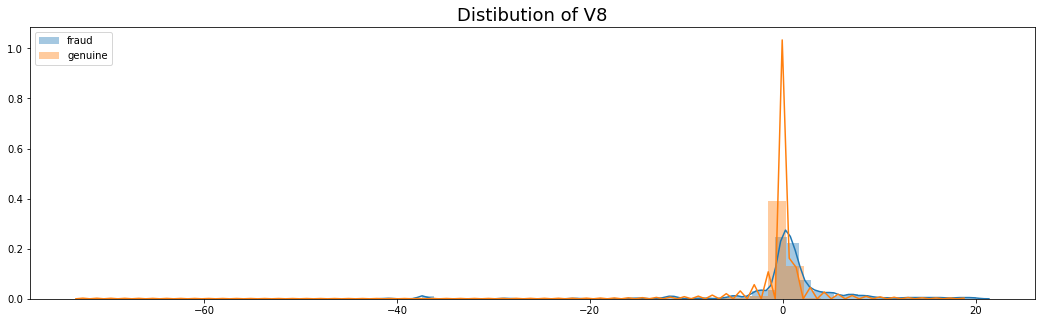

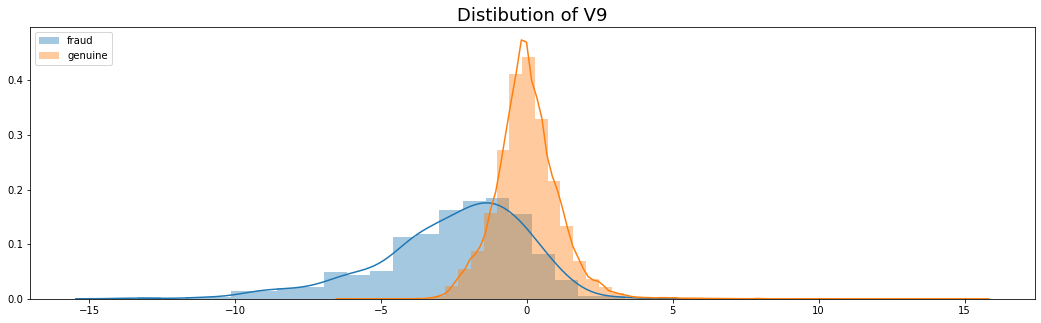

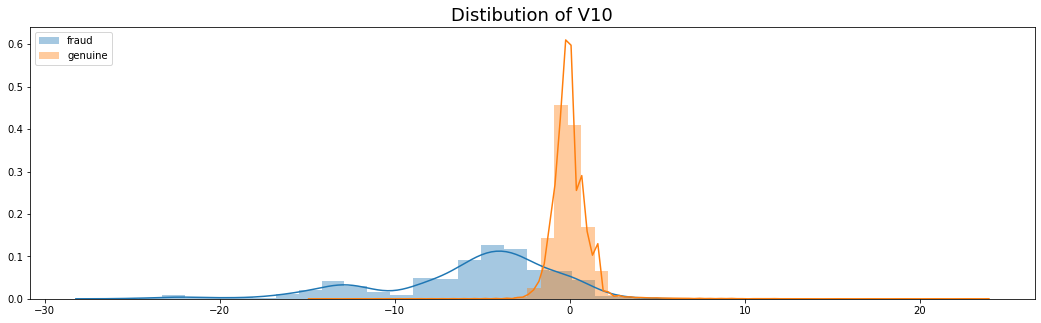

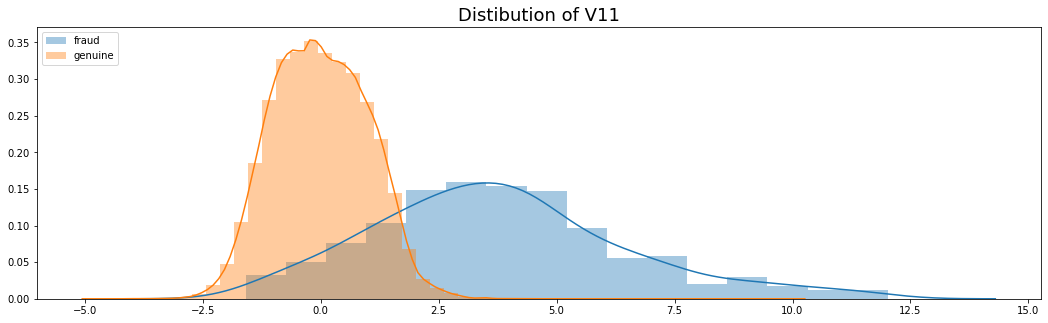

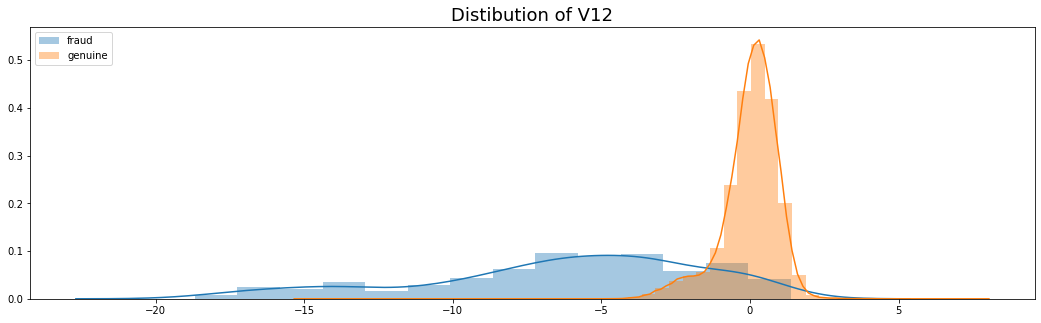

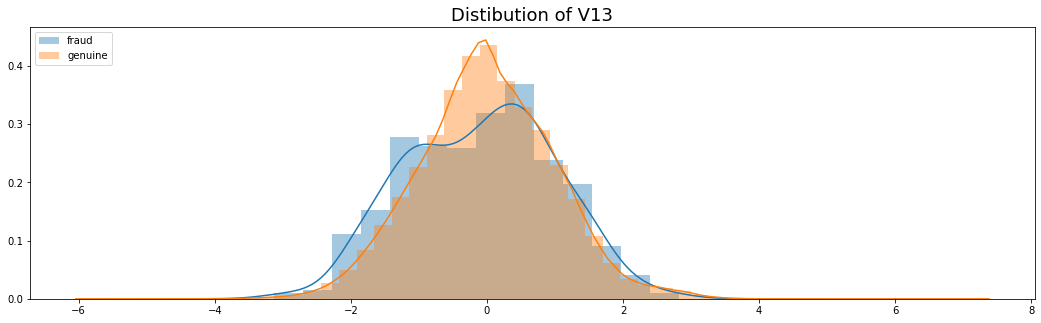

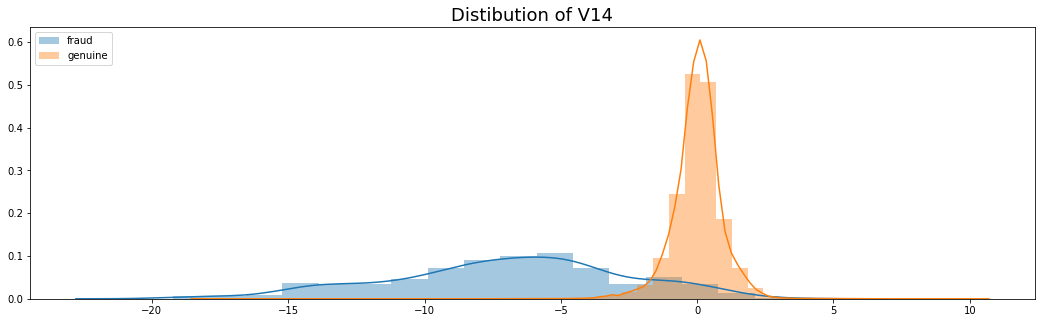

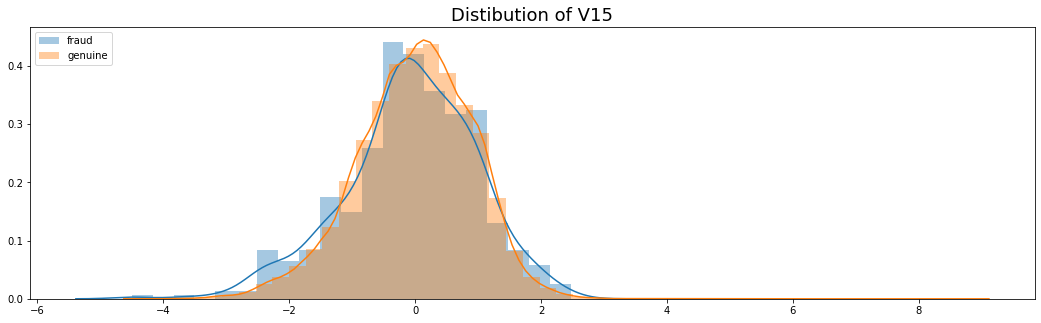

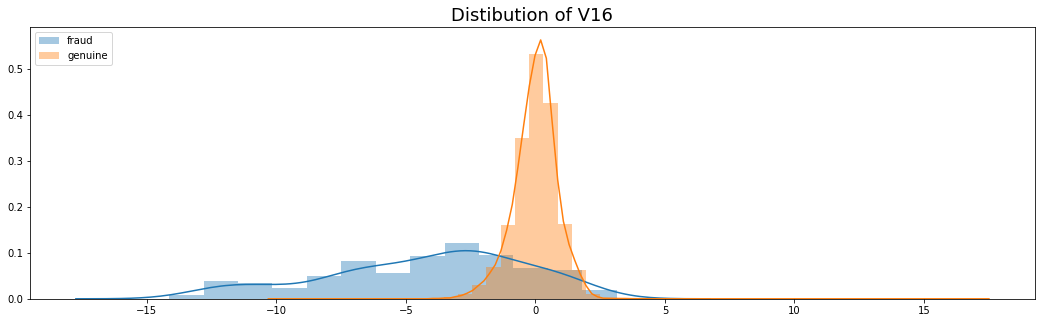

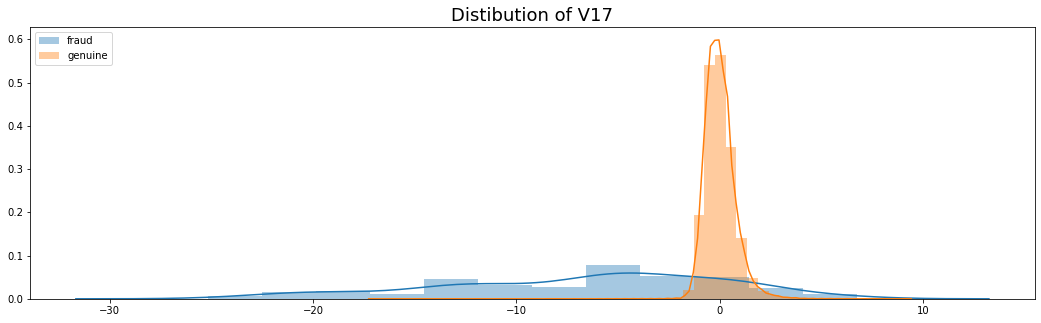

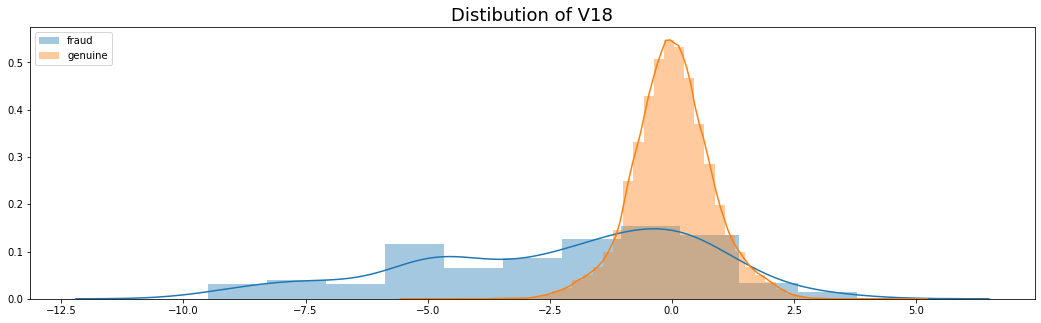

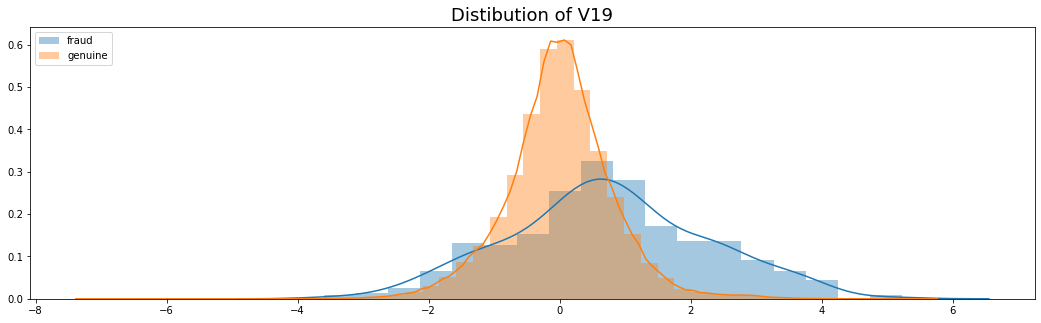

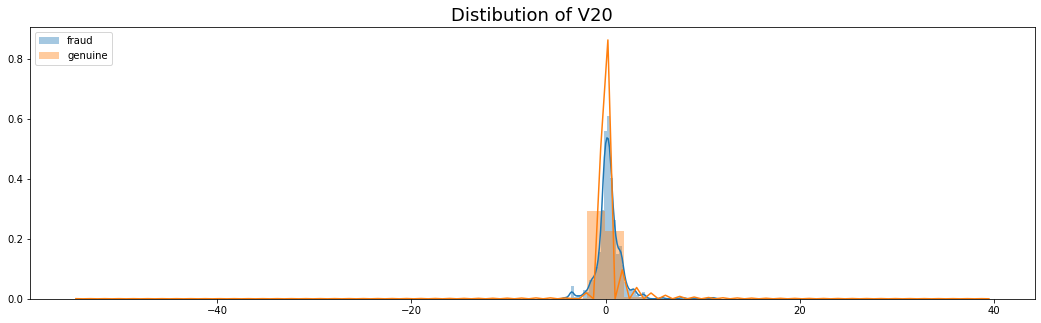

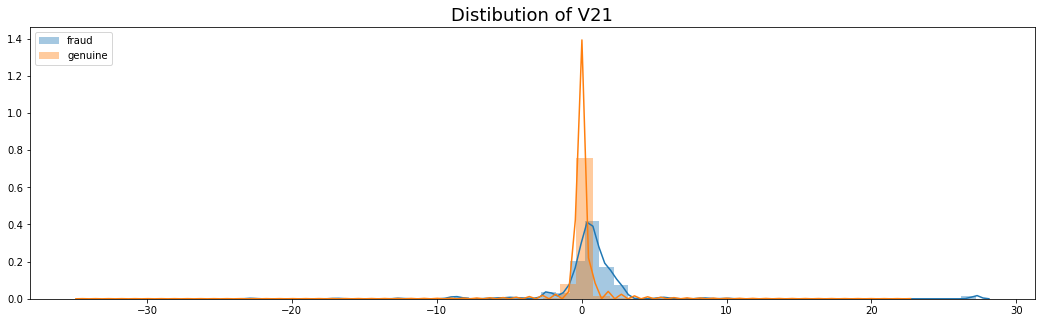

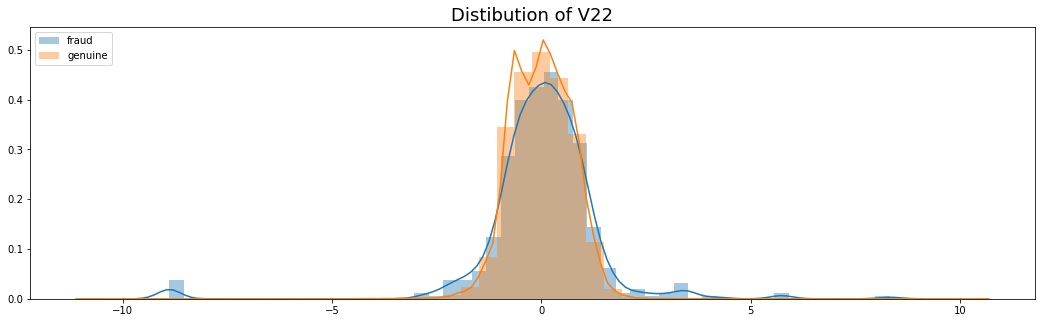

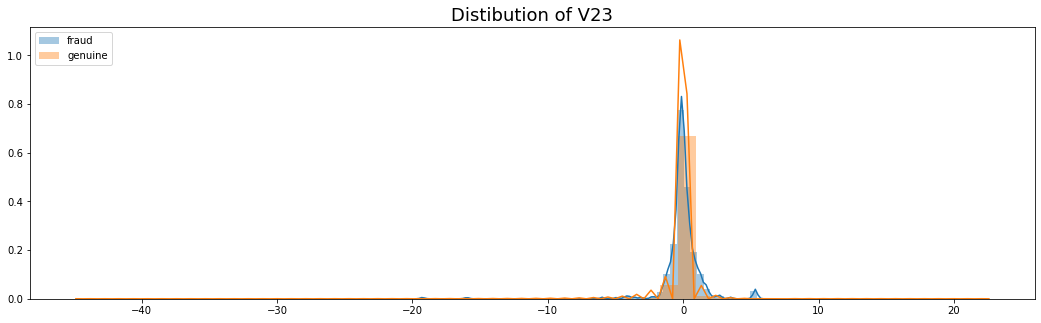

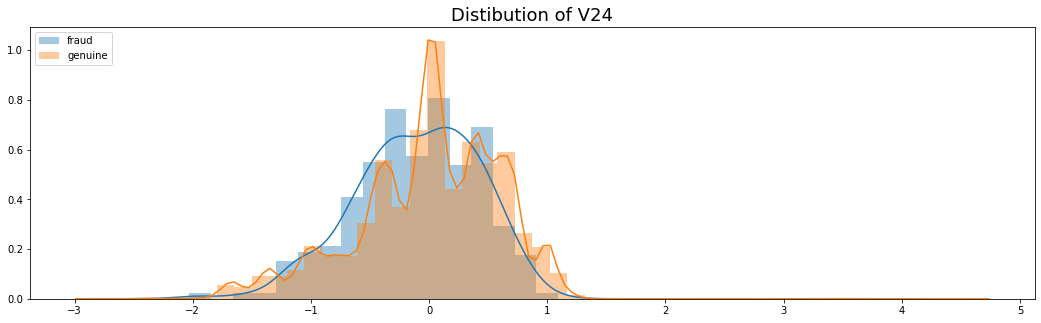

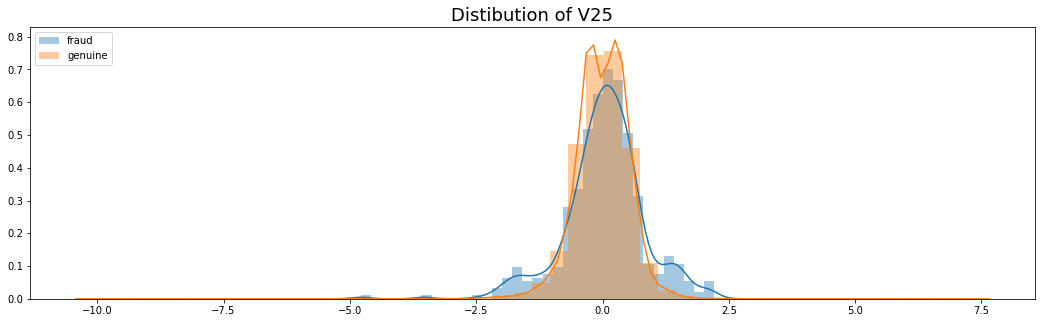

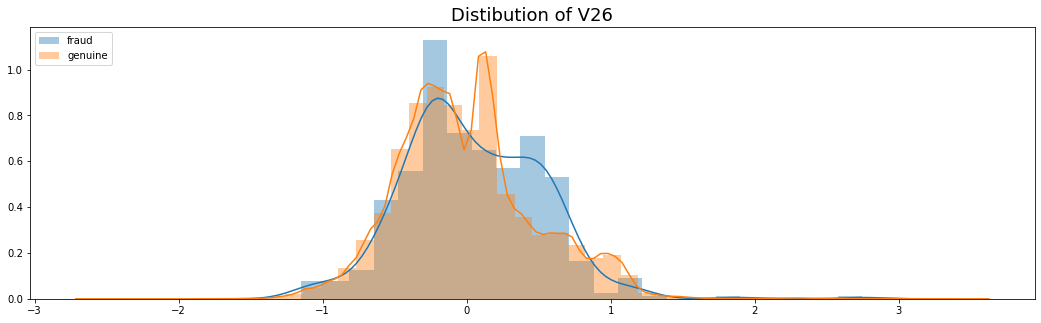

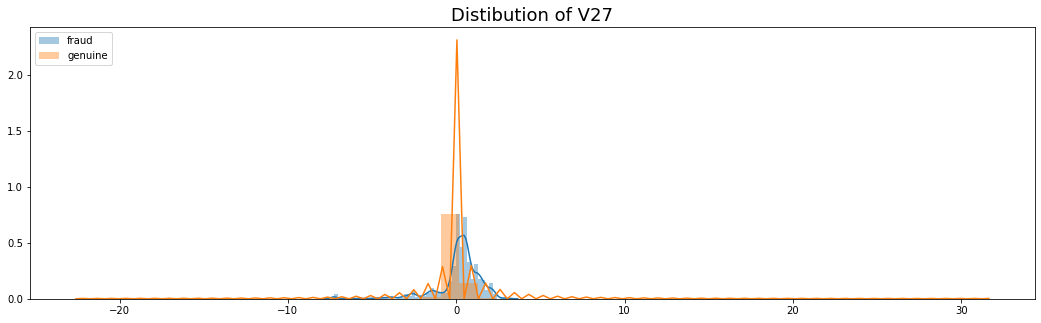

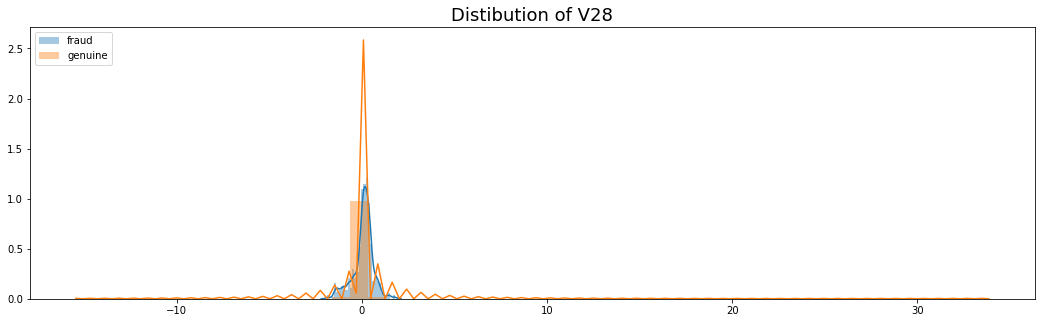

In [25]:
# features acquired from PCA
features = df.iloc[:,1:29].columns
# compare distributions of features by class in order to find the
# features that can identify fraudulent transactions
for feature in features:
    fig, ax = plt.subplots() # generates figure and axis objects
    fig.set_size_inches([18,5]) # adjust the figure size in inches
    # plot the distribution of fraudulent transactions on the axis
    sns.distplot(df_fraud[feature], label='fraudulent', axlabel='', ax=ax)
    # plt the distribution of genuine transactions on the axis
    sns.distplot(df_genuine[feature], label='genuine', axlabel='', ax=ax)
    # set the title
    ax.set_title('Distibution of '+str(feature), size=18)
    # shows the legend - contains labels
    ax.legend(loc='upper left')

* As seen from the above distributions, it is possible to distinguish *fraudulent* transactions from *genuine* transactions based on some features, where the distributions of a feature by w.r.t. target variable does not overlap. In this regard, it is possible to use features such as V9, V10, V11, V12, V14, V16, V17, and V18.
* I will use `V15`, where the distribution of genuine transactions and fraudulent transactions are approximately same, as the base for a series of scatter plots to distinguish the fraudulent transactions from the genuine transactions.

In [26]:
X = df.drop(['Time', 'Amount', 'Class', 'Hours'], axis=1).values
y = df.Class.values
features_genuine = np.arange(X.shape[1])
features_fraudulent = [8, 9, 10, 11, 13, 15, 16, 17]
features_genuine = [
    feature for feature in features_genuine
    if feature not in features_fraudulent + [14]]

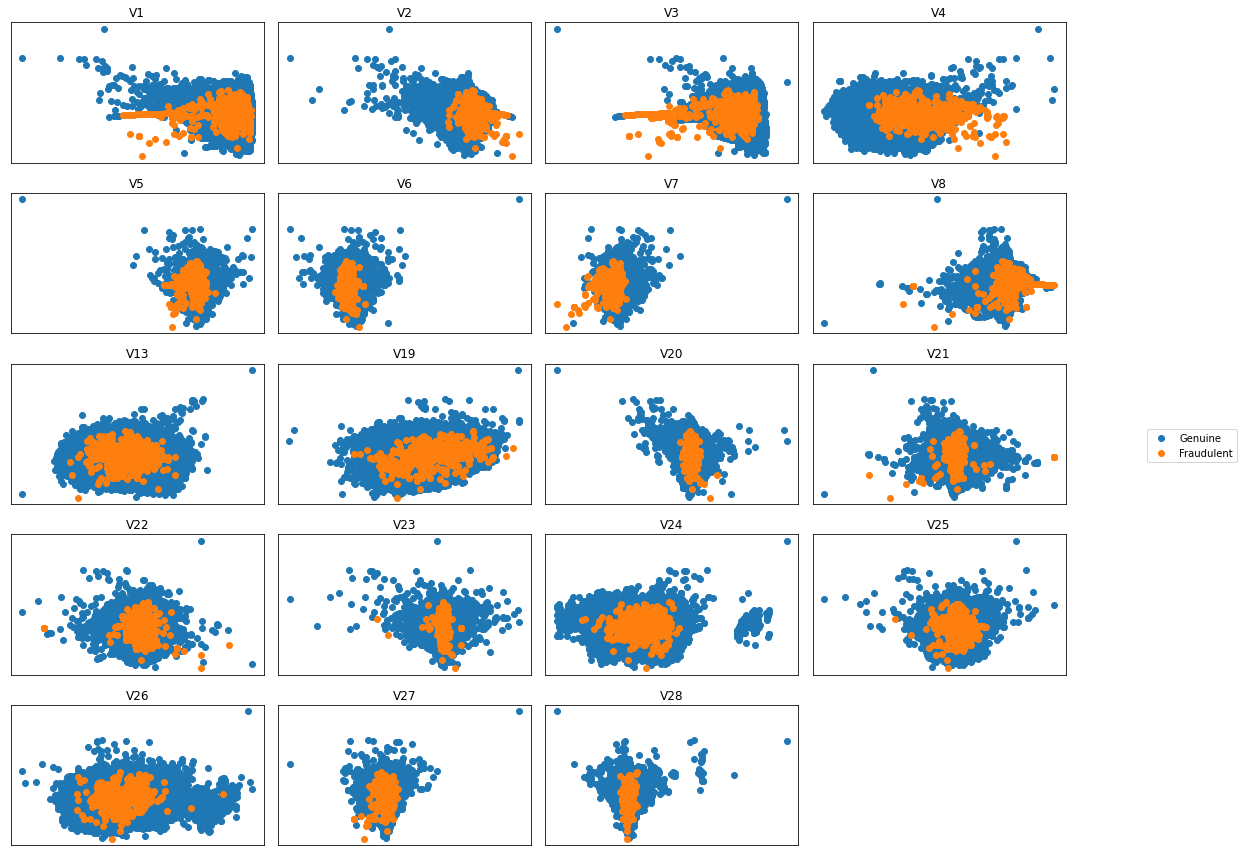

In [27]:
from collections import Counter
counter = Counter(y)
fig, axes = plt.subplots(5,4, figsize=(15,12))
axes = axes.ravel()
for i, feature in zip(np.arange(len(axes)), features_genuine):
    for label, count in counter.items():
        idx = np.where(y == label)[0]
        if i != np.arange(len(axes))[-2]:
            axes[i].scatter(X[idx, feature], X[idx, 14])
            axes[i].set_yticks([])
            axes[i].set_xticks([])
            axes[i].set_title('V' + str(feature+1))
        else:
            axes[i].scatter(X[idx, feature], X[idx, 14], label=label)
            axes[i].set_yticks([])
            axes[i].set_xticks([])
            axes[i].set_title('V' + str(feature+1))
fig.delaxes(axes[-1])
plt.figlegend(['Genuine', 'Fraudulent'], bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.show()

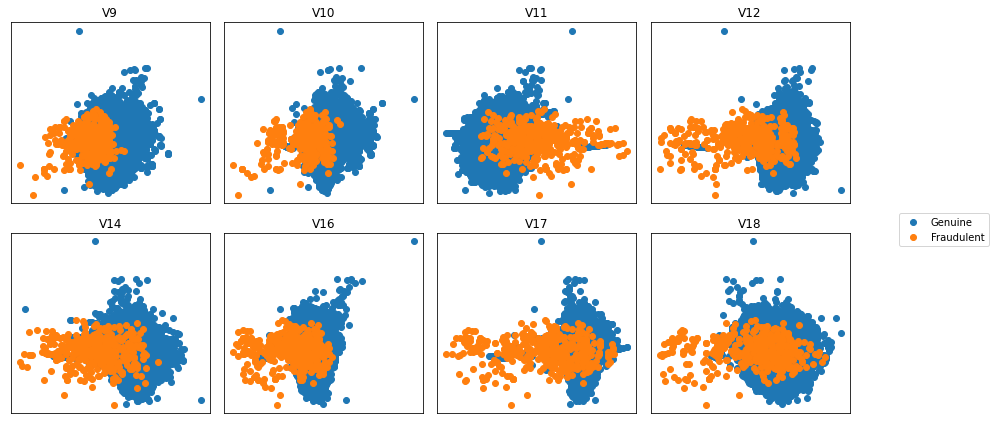

In [28]:
fig, axes = plt.subplots(2,4, figsize=(12, 6))
axes = axes.ravel()
for i, feature in zip(np.arange(len(axes)), features_fraudulent):
    for label, count in counter.items():
        idx = np.where(y == label)[0]
        if i != np.arange(len(axes))[-2]:
            axes[i].scatter(X[idx, feature], X[idx, 14])
            axes[i].set_yticks([])
            axes[i].set_xticks([])
            axes[i].set_title('V' + str(feature+1))
        else:
            axes[i].scatter(X[idx, feature], X[idx, 14], label=label)
            axes[i].set_yticks([])
            axes[i].set_xticks([])
            axes[i].set_title('V' + str(feature+1))
plt.figlegend(['Genuine', 'Fraudulent'], bbox_to_anchor=(1.15, 0.5))
plt.tight_layout()
plt.show()